# Chapter 2 Numpy
## Numpy Arrays

It adds the capabilities of N-dimensional arrays, element-by-element operations (broadcasting), core
mathematical operations like linear algebra, and the ability to wrap C/C++/Fortran
code. 

The Python list object can store nearly any type of Python object as
an element. But operating on the elements in a list can only be done through iterative
loops, which is computationally inefficient in Python.

The ndarray is similar to lists, but rather than being highly flexible by storing different
types of objects in one list, only the same type of element can be stored in each column.

Unlike the ndarray objects, matrix objects can and only will be two dimensional. This
means that trying to construct a third or higher dimension is not possible.

### Array Creation and Data Typing

In [14]:
# How to create an array in Munpy

import numpy as np

alist = [1,2,3]

arr = np.array(alist)

arr = np.zeros(5)

arr = np.arange(100)

arr = np.linspace(0,1,100)

arr = np.logspace(0,1,100,base=10.0)

image = np.zeros((5,5))

cube = np.zeros((3,3,3)).astype(int) + 1 

array([[[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]])

Now that we have created arrays, we can reshape them in many other ways.

In [16]:
arr1d = np.arange(1000)

arr3d = arr1d.reshape((10,10,10))

arr3d = np.reshape(arr1d,(10,10,10))

# Inversely, we can flatten arrays

arr2d = np.zeros((10,10))

arr1d = arr2d.ravel()

print(arr1d.shape)

(100,)


in Python there is a global function called zip that will create a list of tuples
like we see above for the toadd object. So we show how to use zip to populate the same
recarray.

### Indexing and Slicing



In [25]:
alist = [[1,2],[3,4]]

alist[0][1]

# If we want to return the right-hand column

arr = np.array(alist)

print(arr[0,1])

print(arr[:,1]) # the last coloum

print(arr[1,:]) # the botomn row

2
[2 4]
[3 4]


Sometimes there are more complex indexing schemes required, such as conditional
indexing. The most commonly used type is numpy.where(). With this function you can
return the desired indices from an array, regardless of its dimensions, based on some
conditions(s).

In [28]:
# Creating an array
arr = np.arange(5)
# Creating the index array
index = np.where(arr > 2)
print(index)
# Creating the desired array
new_arr = arr[index]
print(new_arr)

(array([3, 4], dtype=int64),)
[3 4]


However, you may want to remove specific indices instead. To do this you can use
numpy.delete(). The required input variables are the array and indices that you want
to remove.

In [29]:
new_arr = np.delete(arr, index)

print(new_arr)

[0 1 2]


Instead of using the numpy.where function, we can use a simple boolean array to return
specific elements

In [31]:
index = arr > 2
print(index)

new_arr = arr[index]

print(new_arr)

[False False False  True  True]
[3 4]


## Boolean Statements and Numpy Arrays
Boolean statements are commonly used in combination with the and operator and the
or operator. These operators are useful when comparing single boolean values to one
another, but when using NumPy arrays, you can only use & and | as this allows fast
comparisons of boolean values.


In [36]:
# Creating an image
img1 = np.zeros((20, 20)) + 3
img1[4:-4, 4:-4] = 6
img1[7:-7, 7:-7] = 9
# See Plot A
# Let's filter out all values larger than 2 and less than 6.
index1 = img1 > 2
index2 = img1 < 6
compound_index = index1 & index2
# The compound statement can alternatively be written as
compound_index = (img1 > 3) & (img1 < 7)
img2 = np.copy(img1)
img2[compound_index] = 0
# See Plot B.
# Making the boolean arrays even more complex
index3 = img1 == 9
index4 = (index1 & index2) | index3
img3 = np.copy(img1)
img3[index4] = 0
# See Plot C.

### Text Files

Accessing and recording data this way can be very flexible and fast, but there is one
downside: if the file is large, then accessing or modulating the data will be cumbersome
and slow. Getting the data directly into a numpy.ndarray would be the best option. We
can do this by using a NumPy function called loadtxt. If the data is structured with
rows and columns, then the loadtxt command will work very well as long as all the data
is of a similar type, i.e., integers or floats. We can save the data through numpy.savetxt
as easily and quickly as with numpy.readtxt.

### Binary Files

## Math
Python comes with its own math module that works on Python native objects. Unfortunately, if you try to use math.cos on a NumPy array, it will not work, as the math
functions are meant to operate on elements and not on lists or arrays. Hence, NumPy
comes with its own set of math tools.

### Linear Algebra
NumPy arrays do not behave like matrices in linear algebra by default. Instead, the
operations are mapped from each element in one array onto the next. This is quite
a useful feature, as loop operations can be done away with for efficiency. But what
about when transposing or a dot multiplication are needed? Without invoking other
classes, you can use the built-in numpy.dot and numpy.transpose to do such operations.
The syntax is Pythonic, so it is intuitive to program. Or the math purist can use
the numpy.matrix object instead. We will go over both examples below to illustrate
the differences and similarities between the two options. More importantly, we will
compare some of the advantages and disadvantages between the numpy.array and the
numpy.matrix objects.

A classic example is solving a system of equations:

$$
\begin{aligned} 3 x + 6 y - 5 z & = 12 \\ x - 3 y + 2 z & = - 2 \\ 5 x - y + 4 z & = 10 \end{aligned}
$$

$$
\left[ \begin{array} { c c c } { 3 } & { 6 } & { - 5 } \\ { 1 } & { - 3 } & { 2 } \\ { 5 } & { - 1 } & { 4 } \end{array} \right] \left[ \begin{array} { l } { x } \\ { y } \\ { z } \end{array} \right] = \left[ \begin{array} { c } { 12 } \\ { - 2 } \\ { 10 } \end{array} \right]
$$


In [38]:
import numpy as np
# Defining the matrices
A = np.matrix([[3, 6, -5],
[1, -3, 2],
[5, -1, 4]])
B = np.matrix([[12],
[-2],
[10]])
# Solving for the variables, where we invert A
X = A ** (-1) * B
print(X)
# matrix([[ 1.75],
# [ 1.75],
# [ 0.75]])

[[1.75]
 [1.75]
 [0.75]]


+ Not all matrices are invertible, so this method of solving for solutions
in a system does not always work. You can sidestep this problem by
using numpy.linalg.svd,5 which usually works well inverting poorly
conditioned matrices.


In [39]:
import numpy as np
a = np.array([[3, 6, -5],
[1, -3, 2],
[5, -1, 4]])
# Defining the array
b = np.array([12, -2, 10])
# Solving for the variables, where we invert A
x = np.linalg.inv(a).dot(b)
print(x)


[1.75 1.75 0.75]


# Chapter 3 Scipy
Where does SciPy come into the picture? It’s a package that utilizes NumPy arrays and manipulations to
take on standard problems that scientists and engineers commonly face: integration,
determining a function’s maxima or minima, finding eigenvectors for large sparse
matrices, testing whether two distributions are the same, and much more. 

## Optimization and Minimization

### Data Modeling and Fitting

curve_fit to do linear regression




[1.00438534 2.00521295]


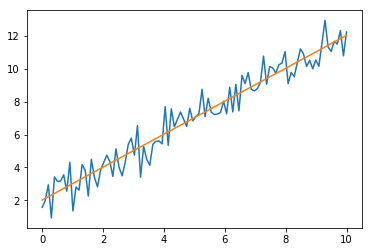

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
# Creating a function to model and create data
def func(x, a, b):
    return a * x + b
# Generating clean data
x = np.linspace(0, 10, 100)
y = func(x, 1, 2)
# Adding noise to the data
yn = y + 0.9 * np.random.normal(size=len(x))
# Executing curve_fit on noisy data
popt, pcov = curve_fit(func, x, yn)
# popt returns the best fit values for parameters of
# the given model (func).
print(popt)

yy = func(x,popt[0],popt[1])


plt.figure()

plt.plot(x,yn)
plt.plot(x,yy)
plt.show()

Take this a step further, we can do a least-squares fit to a Gaussian profile, a non-linear
function:

$$
a * \exp \left( \frac { - ( x - \mu ) ^ { 2 } } { 2 \sigma ^ { 2 } } \right)
$$



[ 1.077216    5.07238956 -1.822921  ]


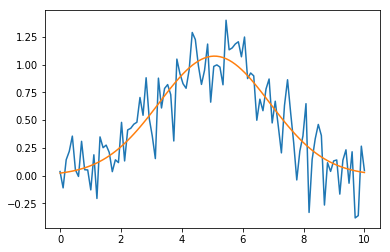

In [49]:
# Creating a function to model and create data
def func(x, a, b, c):
    return a*np.exp(-(x-b)**2/(2*c**2))
# Generating clean data
x = np.linspace(0, 10, 100)
y = func(x, 1, 5, 2)
# Adding noise to the data
yn = y + 0.2 * np.random.normal(size=len(x))
# Executing curve_fit on noisy data
popt, pcov = curve_fit(func, x, yn)
print(popt)

import matplotlib.pyplot as plt

yy = func(x,popt[0],popt[1],popt[2])

plt.figure()
plt.plot(x,yn)
plt.plot(x,yy)
plt.show()

In [ ]:
# Two-Gaussian model
def func(x, a0, b0, c0, a1, b1,c1):
return a0*np.exp(-(x - b0) ** 2/(2 * c0 ** 2))\
+ a1 * np.exp(-(x - b1) ** 2/(2 * c1 ** 2))
# Generating clean data
x = np.linspace(0, 20, 200)
y = func(x, 1, 3, 1, -2, 15, 0.5)
# Adding noise to the data
yn = y + 0.2 * np.random.normal(size=len(x))
# Since we are fitting a more complex function,
# providing guesses for the fitting will lead to
# better results.
guesses = [1, 3, 1, 1, 15, 1]
# Executing curve_fit on noisy data
popt, pcov = curve_fit(func, x, yn,
p0=guesses)

### Solutions to Functions
With data modeling and fitting under our belts, we can move on to finding solutions,
such as “What is the root of a function?” or “Where do two functions intersect?” SciPy
provides an arsenal of tools to do this in the optimize module.


In [51]:
from scipy.optimize import fsolve
import numpy as np
line = lambda x: x + 3
solution = fsolve(line, -2)
print(solution)

[-3.]


Finding the intersection points between two equations is nearly as simple

[13.40773078 18.11366128 31.78330863 37.0799992  39.84837786 43.8258775 ] [-0.36592269 -0.31886339 -0.18216691 -0.12920001 -0.10151622 -0.06174122]


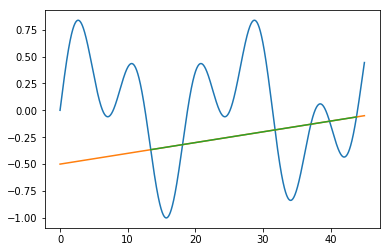

In [60]:
from scipy.optimize import fsolve
import numpy as np
# Defining function to simplify intersection solution
def findIntersection(func1, func2, x0):
    return fsolve(lambda x : func1(x) - func2(x), x0)
# Defining functions that will intersect
funky = lambda x : np.cos(x / 5) * np.sin(x / 2)
line = lambda x : 0.01 * x - 0.5
# Defining range and getting solutions on intersection points
x = np.linspace(0,45,10000)
result = findIntersection(funky, line, [15, 20, 30, 35, 40, 45])
# Printing out results for x and y
print(result, line(result))


funky_y = np.cos(x/5) * np.sin(x/2)
line_y = 0.01*x - 0.5
plt.figure()
plt.plot(x,funky_y)
plt.plot(x,line_y)
plt.plot(result,line(result))
plt.show()


## Interpolation
Data that contains information usually has a functional form, and as analysts we want
to model it. Given a set of sample data, obtaining the intermediate values between the
points is useful to understand and predict what the data will do in the non-sampled domain. SciPy offers well over a dozen different functions for interpolation, ranging from
those for simple univariate cases to those for complex multivariate ones. Univariate
interpolation is used when the sampled data is likely led by one independent variable, whereas multivariate interpolation assumes there is more than one independent
variable.

There are two basic methods of interpolation: (1) Fit one function to an entire dataset
or (2) fit different parts of the dataset with several functions where the joints of each
function are joined smoothly. The second type is known as a spline interpolation, which
can be a very powerful tool when the functional form of data is complex.




Text(0.5,1,'Synthetic data points (red dots) interpolated with linear and quadratic parameters.')

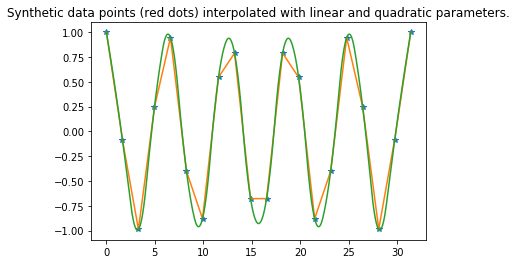

In [70]:
import numpy as np
from scipy.interpolate import interp1d
# Setting up fake data
x = np.linspace(0, 10 * np.pi, 20)
y = np.cos(x)
# Interpolating data
fl = interp1d(x, y, kind='linear')
fq = interp1d(x, y, kind='quadratic')
# x.min and x.max are used to make sure we do not
# go beyond the boundaries of the data for the
# interpolation.
xint = np.linspace(x.min(), x.max(), 1000)
yintl = fl(xint)
yintq = fq(xint)

plt.figure()
plt.plot(x,y,"*")
plt.plot(xint,yintl)
plt.plot(xint,yintq)
plt.title("Synthetic data points (red dots) interpolated with linear and quadratic parameters.")

Can we interpolate noisy data? Yes, and it is surprisingly easy, using a spline-fitting
function called scipy.interpolate.UnivariateSpline.

Text(0.5,1,'Interpolating noisy synthetic data.')

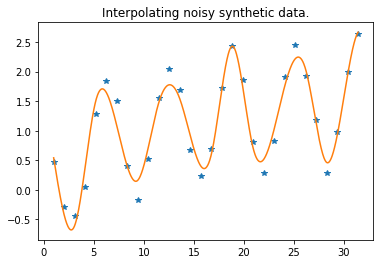

In [71]:
import numpy as np
import matplotlib.pyplot as mpl
from scipy.interpolate import UnivariateSpline
# Setting up fake data with artificial noise
sample = 30
x = np.linspace(1, 10 * np.pi, sample)
y = np.cos(x) + np.log10(x) + np.random.randn(sample) / 10
# Interpolating the data
f = UnivariateSpline(x, y, s=1)

# x.min and x.max are used to make sure we do not
# go beyond the boundaries of the data for the
# interpolation.
xint = np.linspace(x.min(), x.max(), 1000)
yint = f(xint)

plt.figure()
plt.plot(x,y,"*")
plt.plot(xint,yint)
plt.title("Interpolating noisy synthetic data.")

Last but not least, we go over a multivariate example—in this case, to reproduce an
image. The scipy.interpolate.griddata function is used for its capacity to deal with
unstructured N-dimensional data. For example, if you have a 1000 × 1000-pixel image,
and then randomly selected 1000 points, how well could you reconstruct the image?


In [ ]:
import numpy as np
from scipy.interpolate import griddata
# Defining a function
ripple = lambda x, y: np.sqrt(x**2 + y**2)+np.sin(x**2 + y**2)
# Generating gridded data. The complex number defines
# how many steps the grid data should have. Without the
# complex number mgrid would only create a grid data structure
# with 5 steps.
grid_x, grid_y = np.mgrid[0:5:1000j, 0:5:1000j]
# Generating sample that interpolation function will see
xy = np.random.rand(1000, 2)
sample = ripple(xy[:,0] * 5 , xy[:,1] * 5)
# Interpolating data with a cubic
grid_z0 = griddata(xy * 5, sample, (grid_x, grid_y), method='cubic')

In [ ]:
import numpy as np
from scipy.interpolate import SmoothBivariateSpline as SBS
# Defining a function
ripple = lambda x, y: np.sqrt(x**2 + y**2)+np.sin(x**2 + y**2)
# Generating sample that interpolation function will see
xy= np.random.rand(1000, 2)
x, y = xy[:,0], xy[:,1]
sample = ripple(xy[:,0] * 5 , xy[:,1] * 5)
# Interpolating data
fit = SBS(x * 5, y * 5, sample, s=0.01, kx=4, ky=4)
interp = fit(np.linspace(0, 5, 1000), np.linspace(0, 5, 1000))

## Integration

### Analytic Integration

$\int _ { 0 } ^ { 3 } \cos ^ { 2 } \left( e ^ { x } \right) \mathrm { d } x$



In [73]:
import numpy as np
from scipy.integrate import quad
# Defining function to integrate
func = lambda x: np.cos(np.exp(x)) ** 2
# Integrating function with upper and lower
# limits of 0 and 3, respectively
solution = quad(func, 0, 3)
print(solution)
# The first element is the desired value
# and the second is the error.
# (1.296467785724373, 1.397797186265988e-09)

(1.296467785724373, 1.397797133112089e-09)


### Numerical Integration

Move on to the problem where we are given data instead of some known equation
and numerical integration is needed.





In [74]:
import numpy as np
from scipy.integrate import quad, trapz
# Setting up fake data
x = np.sort(np.random.randn(150) * 4 + 4).clip(0,5)
func = lambda x: np.sin(x) * np.cos(x ** 2) + 1
y = func(x)
# Integrating function with upper and lower
# limits of 0 and 5, respectively
fsolution = quad(func, 0, 5)
dsolution = trapz(y, x=x)

print('fsolution = ' + str(fsolution[0]))
print('dsolution = ' + str(dsolution))
print('The difference is ' + str(np.abs(fsolution[0] - dsolution)))
# fsolution = 5.10034506754
# dsolution = 5.04201628314
# The difference is 0.0583287843989.

fsolution = 5.100345067540932
dsolution = 5.015585202039256
The difference is 0.08475986550167569


The quad integrator can only work with a callable function, whereas trapz is a numerical
integrator that utilizes data points.

## Statistics


In [75]:
import numpy as np

x = np.random.randn(1000)

mean = x.mean()

std = x.std()

var = x.var()


### Continuous and Discrete Distributions

When we call a distribution from scipy.stats, we can extract its information in several
ways: probability density functions (PDFs), cumulative distribution functions (CDFs),
random variable samples (RVSs), percent point functions (PPFs), and more. 



In [ ]:
import numpy as np
import scipy.stats import norm
# Set up the sample range
x = np.linspace(-5,5,1000)


# Here set up the parameters for the normal distribution,
# where loc is the mean and scale is the standard deviation.
dist = norm(loc=0, scale=1)
# Retrieving norm's PDF and CDF
pdf = dist.pdf(x)
cdf = dist.cdf(x)
# Here we draw out 500 random values from the norm.
sample = dist.rvs(500)

## Functions

There are more than 60 statistical functions in SciPy, which can be overwhelming to
digest if you simply are curious about what is available. The best way to think of
the statistics functions is that they either describe or test samples—for example, the
frequency of certain values or the Kolmogorov-Smirnov test, respectively.

## Spatial and Clustering Analysis

From biological to astrophysical sciences, spatial and clustering analysis are key to identifying patterns, groups, and clusters. In biology, for example, the spacing of different
plant species hints at how seeds are dispersed, interact with the environment, and grow.
In astrophysics, these analysis techniques are used to seek and identify star clusters,
galaxy clusters, and large-scale filaments (composed of galaxy clusters). In the computer
science domain, identifying and mapping complex networks of nodes and information
is a vital study all on its own. With big data and data mining, identifying data clusters
is becoming important, in order to organize discovered information, rather than being
overwhelmed by it.

### Vector Quantization
Vector quantization is a general term that can be associated with signal processing, data
compression, and clustering. Here we will focus on the clustering component, starting
with how to feed data to the vq package in order to identify clusters

In [76]:
import numpy as np
from scipy.cluster import vq
# Creating data
c1 = np.random.randn(100, 2) + 5
c2 = np.random.randn(30, 2) - 5
c3 = np.random.randn(50, 2)
# Pooling all the data into one 180 x 2 array
data = np.vstack([c1, c2, c3])
# Calculating the cluster centroids and variance
# from kmeans
centroids, variance = vq.kmeans(data, 3)
# The identified variable contains the information
# we need to separate the points in clusters
# based on the vq function.
identified, distance = vq.vq(data, centroids)
# Retrieving coordinates for points in each vq
# identified core
vqc1 = data[identified == 0]


vqc2 = data[identified == 1]
vqc3 = data[identified == 2]

### Hierarchical Clustering 

Hierarchical clustering is a powerful tool for identifying structures that are nested
within larger structures. But working with the output can be tricky, as we do not get
cleanly identified clusters like we do with the kmeans technique. 

## Signal and Image Processing

SciPy allows us to read and write image files like JPEG and PNG images without
worrying too much about the file structure for color images. 

## Sparse Matrix

With NumPy we can operate with reasonable speeds on arrays containing 106 elements.
Once we go up to 107 elements, operations can start to slow down and Python’s memory
will become limited, depending on the amount of RAM available. What’s the best
solution if you need to work with an array that is far larger—say, 1010 elements? If
these massive arrays primarily contain zeros, then you’re in luck, as this is the property
of sparse matrices. If a sparse matrix is treated correctly, operation time and memory
usage can go down drastically. 



In [77]:
import numpy as np
from scipy.sparse.linalg import eigsh
from scipy.linalg import eigh
import scipy.sparse
import time
N = 3000
# Creating a random sparse matrix
m = scipy.sparse.rand(N, N)
# Creating an array clone of it
a = m.toarray()
print('The numpy array data size: ' + str(a.nbytes) + ' bytes')
print('The sparse matrix data size: ' + str(m.data.nbytes) + ' bytes')
# Non-sparse
t0 = time.time()

res1 = eigh(a)
dt = str(np.round(time.time() - t0, 3)) + ' seconds'
print('Non-sparse operation takes ' + dt)
# Sparse
t0 = time.time()
res2 = eigsh(m)
dt = str(np.round(time.time() - t0, 3)) + ' seconds'
print('Sparse operation takes ' + dt)

The numpy array data size: 72000000 bytes
The sparse matrix data size: 720000 bytes
Non-sparse operation takes 6.857 seconds
Sparse operation takes 0.17 seconds


# Chapter 4 SciKit: Taking SciPy One Step Further 

# Chapter 5 Summary
